# Collecting Data from Log scales: Creep Analysis

:::{admonition} Learning Objectives   
After completing this lesson, you should be able to:  
* reproduce data from images containing **log scales**
* create a Larsen-Miller plot from creep data (stress vs rupture time) at various temperatures
* have a better understanding of the "C" parameter used in creep analysis    
<br>  

This lesson also reinforces the the ability to: 
* load cal() and selectdata() functions from the utilities notebook using `%run getpix_utilities.ipynb` 
* fit data using the lmfit package   
:::

I'm going to look at some data from your Callister textbook and verify that the fitting parameter given in the text is correct. The figure below is for an S-590 superalloy Fe-Co-Cr-Ni and is given as Figure 8.31 Callister 9th edition.

:::{image} ../images/11_fig_8.31_callister_9th.png
:width: 600px
:align: center
:::

<img alt="" src="../images/11_fig_8.31_callister_9th.png" width=600px>

According to the Callister textbook the above data collapses to one curve (shown below) when you take the data and replot it as $(Log(\sigma)$ vs T (C + $Log(t_r)$) where $\sigma$ is in MPa, T is in Kelvin, $t_r$ is in hours and C is a fitting parameter which according to your textbook is 20. 

:::{image} ../images/11_fig_8.33_callister_9th.png
:width: 600px
:align: center
:::

<img alt="" src="../images/11_fig_8.33_callister_9th.png" width=600px>

Figure 8.33 Callister 9th edition. Note that the x-axis in the figure below has been divided by $10^3$ i.e. the point 24 is really 24000.  

Let's get the stress, rupture data from the first figure above.  

In [1]:
%run getpix_utilities.ipynb

Help on function cal in module __main__:

cal(pixpts, plotpts, datatoconvert)
    pixpts = list of three pixel points (typically along axes)
    plotpts = list of three points corresponding to pixpts but in plot units
    datatoconvert = list of pixel points to convert to plot coordinates

Help on function selectdata in module __main__:

selectdata(path_to_image_file, fig_size_as_tuple=(6, 6), color='blue')
    path_to_image_file example: r"C:/Users/Sean/images/xrd data.png"  
    pixel data stored in global variable "pixel_positions"
    fig_size_as_tuple e.g. (8,12) This adjusts the image size shown.



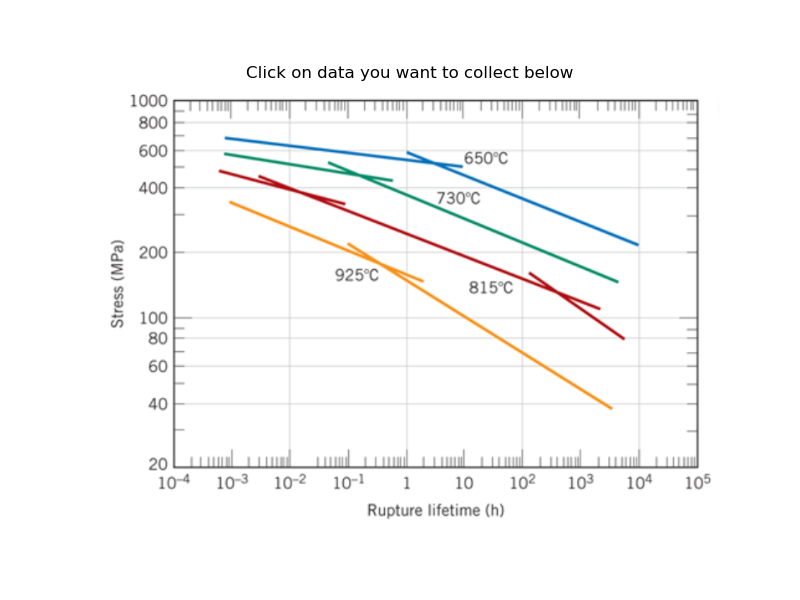

In [2]:
selectdata('../images/11_fig_8.31_callister_9th.png',(8,6) )

:::{image} ../images/11_selected_pts.png
:width: 600px
:align: center
:::

<img alt="" src="../images/11_selected_pts.png" width=400px>

Notice the points I selected above were the minimum needed to define each straight line segment.  

In [4]:
# pixel_positions=[[610.0293439311366, 135.02436764624815],
#  [333.57450522145916, 308.1576979360273],
#  [154.0583761892011, 382.35769793602736],
#  [624.3906342537173, 218.3996334198983],
#  [546.6003116730722, 273.4512463231241],
#  [235.43902135049143, 395.5222140650596],
#  [142.0906342537172, 419.45769793602733],
#  [617.209989092427, 286.6157624521564],
#  [307.24547296339466, 413.4738269682854],
#  [146.87773102791078, 439.80285922634994],
#  [642.3422471569431, 328.5028592263499],
#  [398.2003116730721, 429.0318914844145],
#  [148.07450522145916, 457.7544721295757],
#  [712.951924576298, 65.21253664570474],
#  [87.03902135049144, 64.01576245215637],
#  [87.03902135049144, 503.2318914844144]]

In [18]:
d925C=pixel_positions[0:3]
d815C=pixel_positions[3:7]
d730C=pixel_positions[7:10]
d650C=pixel_positions[10:13]

pxpts=pixel_positions[13:16]
logplotpts=np.log10(np.array([[10**5, 20],[10**(-4), 20],[10**(-4), 1000]]))  #Remember you need the log of the data since we have a log scale

:::{important}
When we have log axes, we need to take the log of the plot points used for calibration. In this problem, both axes have log scales so we take the log of both the x and y values.  This won't always be the case. The data will be converted to log values as well so we will plot these using linear axes as shown below.  
:::

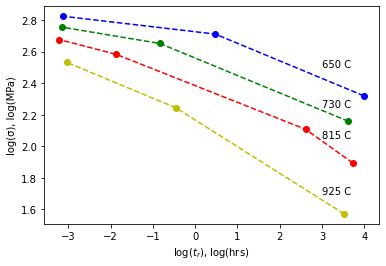

In [19]:
%matplotlib inline
cal650C=cal(pxpts, logplotpts, d650C)
cal730C=cal(pxpts, logplotpts, d730C)
cal815C=cal(pxpts, logplotpts, d815C)
cal925C=cal(pxpts, logplotpts, d925C)

plt.plot(cal650C[:,0], cal650C[:,1], 'b--', marker='o')
plt.plot(cal730C[:,0], cal730C[:,1], 'g--', marker='o')
plt.plot(cal815C[:,0], cal815C[:,1], 'r--', marker='o')
plt.plot(cal925C[:,0], cal925C[:,1], 'y--', marker='o')
plt.text(3, 2.5,'650 C')
plt.text(3, 2.25,'730 C')
plt.text(3, 2.05,'815 C')
plt.text(3, 1.7,'925 C')
plt.xlabel('log($t_r$), log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.show()

## Larsen-Miller Plot   
According to the Callister textbook this data will collapse onto one curve if we plot log(stress) vs T*(20+log($t_r$)).  The value T*(C+log($t_r$)) is known as the Larsen-Miller parameter, LM.  The parameters must be given in the correct units:  $T$ here is the temperature in Kelvin, $t_r$ is the rupture time in hours, and stress is in MPa. The value C is a fitting parameter which is equal to 20 for the data we are using.  For homework, you will have a different value for C.  

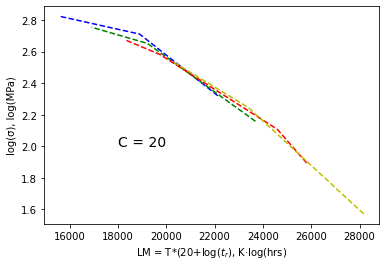

In [21]:
c_value=20 # C parameter

lm650C=(650+273)*(c_value+cal650C[:,0]) #calculating LM (x-axis) for each temperature with a C = 20
lm730C=(730+273)*(c_value+cal730C[:,0])
lm815C=(815+273)*(c_value+cal815C[:,0])
lm925C=(925+273)*(c_value+cal925C[:,0])

plt.plot(lm650C, cal650C[:,1], 'b--') #our stress values (y-axis) are already in log(MPa) units
plt.plot(lm730C, cal730C[:,1], 'g--')
plt.plot(lm815C, cal815C[:,1], 'r--')
plt.plot(lm925C, cal925C[:,1], 'y--')
plt.xlabel('LM = T*(20+log($t_r$), K·log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.text(18000, 2, f"C = {c_value}", fontsize=14)
plt.show()

The data did indeed collapse onto one line!  

Let's take a look at what we get for different values of C to get a feel for how sensitive the fit is to this parameter.  

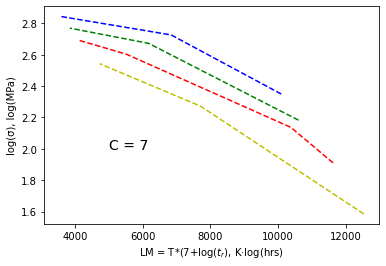

In [36]:
c_value=7

lm650C=(650+273)*(c_value+cal650C[:,0]) #calculating LM for each temperature and a C = 20
lm730C=(730+273)*(c_value+cal730C[:,0])
lm815C=(815+273)*(c_value+cal815C[:,0])
lm925C=(925+273)*(c_value+cal925C[:,0])

plt.plot(lm650C, cal650C[:,1], 'b--')
plt.plot(lm730C, cal730C[:,1], 'g--')
plt.plot(lm815C, cal815C[:,1], 'r--')
plt.plot(lm925C, cal925C[:,1], 'y--')
plt.xlabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.ylabel('log(σ), log(MPa)')
plt.text(5000, 2, f"C = {c_value}", fontsize=14)
plt.show()

and magically our data collapses to one curve.  Rather than using the plot above to read off the LM value (x-axis) for a specific stress value (y-axis), we will just fit the data to a polynomial function, $$LM = a0+a1 \ log(\sigma)+a2\ log(\sigma)^2+a3\ log(\sigma)^3 +...$$  so $log(\sigma)$ is our independent variable.  Let's replot: 

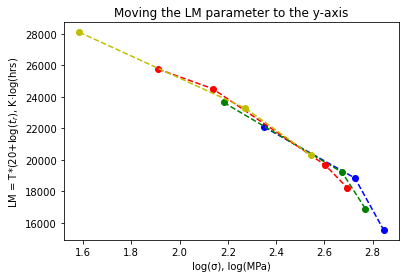

In [40]:
# x-data is cal650C[:,1],cal730C[:,1],cal815C[:,1],cal925C[:,1]
# y-data is lm650C, lm730C, lm815C, lm925C, respectively

plt.plot(cal650C[:,1],lm650C,  'b--', marker='o')
plt.plot(cal730C[:,1],lm730C,  'g--', marker='o')
plt.plot(cal815C[:,1],lm815C,  'r--', marker='o')
plt.plot(cal925C[:,1],lm925C,  'y--', marker='o')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.title('Moving the LM parameter to the y-axis')

plt.show()

Let's combine our data sets so we can fit them.  We also want the final dataset to be sorted by the x-values. 

In [41]:
# two methods to combine the data
# option 1: use np.append
#x=np.append(np.append(np.append(cal650C[:,1],cal730C[:,1]),cal815C[:,1]),cal925C[:,1])
#y=np.append(np.append(np.append(lm650C, lm730C),lm815C),lm925C)

# option 2: use np.hstack
x=np.hstack((cal650C[:,1], cal730C[:,1], cal815C[:,1], cal925C[:,1]))
y=np.hstack((lm650C, lm730C, lm815C, lm925C))

# now let's put data together as (x,y) pairs so we can sort by x values
xypairs=np.array(list(zip(x,y)))  #put all our data together as x,y pairs
xysorted=xypairs[xypairs[:,0].argsort()] #sort our data according to the x value, argsort() returns indices of sorted array

# separate data back to 1D lists for x-values and y-values
logσ=xysorted[:,0]
lmparam=xysorted[:,1]

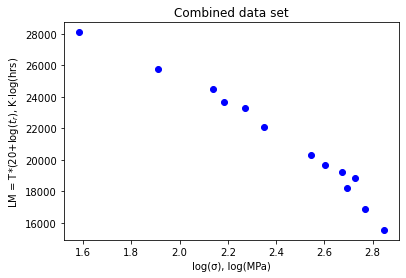

In [42]:
# check our combined dataset

plt.plot(logσ,lmparam,  'bo')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.title('Combined data set')

plt.show()

## Fit the above data to a polynomial

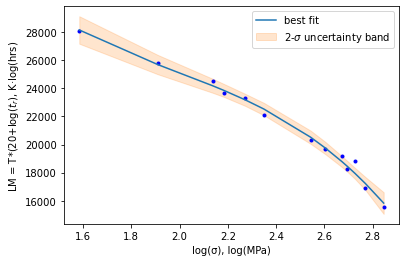

Best Values: {'a0': 82394.01217068503, 'a1': -73688.05838766707, 'a2': 33978.07537229554, 'a3': -5729.188956922097}


In [46]:
from lmfit import models, Model, Parameters

# define our polynomial fit
def poly(x, a0, a1, a2, a3):
    return(a0+a1*x+a2*x**2+a3*x**3)

model = Model(poly) 

# print(f'parameter names: {model.param_names}')
# print(f'independent variables: {model.independent_vars}')

# now we help the fitting process by giving starting values and bounds on our parameters
params = Parameters()
# parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('a0', 1, True, None, None, None, None),
                ('a1', 1, True, None, None, None, None),
                ('a2', 1, True, None, None, None, None),
                ('a3', 1, True, None, None, None, None))

# our x and y data
xdata=logσ
ydata=lmparam

result = model.fit(ydata, params, x=xdata) #now we perform the fit to our x & y data with the given params
dely = result.eval_uncertainty(x=xdata, sigma=2) #uncertainty

# only need below if you have more than one model added together (see week 8 lesson)
#comps = result.eval_components() 

plt.plot(xdata, ydata, 'b.') #our x,y data blue dots
#plt.plot(xdata, result.init_fit, '--', label='initial fit')
plt.plot(xdata, result.best_fit, '-', label='best fit')
plt.fill_between(xdata, result.best_fit-dely, result.best_fit+dely,color='C1', alpha=0.2,
                 label='2-$\sigma$ uncertainty band')
plt.legend(loc='best')
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({c_value}+log($t_r$), K·log(hrs)')
plt.show()

# print(result.fit_report())
print(f'Best Values: {result.best_values}')

**Example Problem for Rupture Lifetime using our polynomial fit from above:**

>What is the rupture lifetime at 775 C under a stress load of 355 MPa?  
We just need to calculate the LM parameter from our polynomial fit and set that equal to T*(20+log($t_r$)) and solve for the rupture time.  

In [44]:
result.best_values.values()

dict_values([82394.01217068503, -73688.05838766707, 33978.07537229554, -5729.188956922097])

In [45]:
poly(np.log10(355),*result.best_values.values()) # LM value at 355 MPa

20431.290100041675

20431.3 = (775+273)*(20+log($t_r$))  

therefore the log($t_r$) = 20431.3 /  (775+273) - 20 = -0.50448  

or $t_r$ = $10^{-0.50448}$ = 0.31 hours

<hr style='height:4px' \>

## Where did the Callister textbook get this C=20 value?  Let's see if we can find a way to fit our data to determine C.  

First, let's look at a few C values around the value of 20 and see what the data looks like.  You can see below the goodness of fit to a polynomial for various C values.  The routine below will vary this C parameter until the optimal fit is achieved.  In this case it looks like a C of 20.789 is best.  
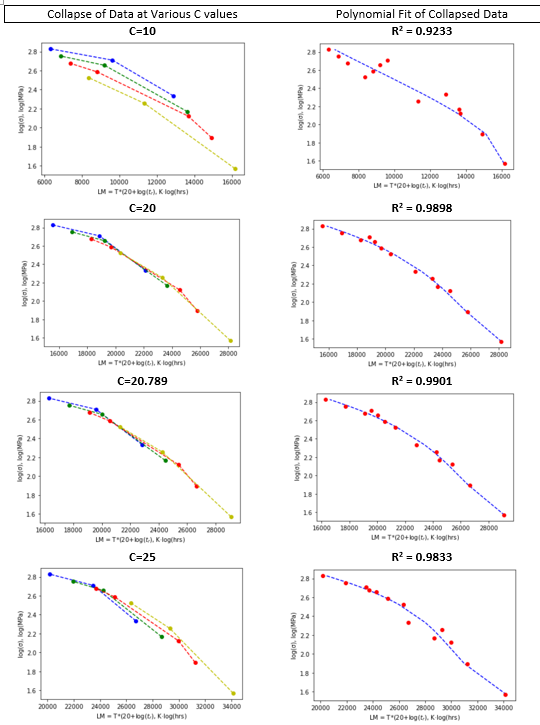

In [47]:
from lmfit import models, Model, Parameters, minimize
from scipy.optimize import curve_fit
from scipy import optimize

def poly(x, a0, a1, a2, a3):
    return(a0+a1*x+a2*x**2+a3*x**3)

def cost(c, cal650C, cal730C, cal815C, cal925C):
    
    def poly(x, a0, a1, a2, a3):
        return(a0+a1*x+a2*x**2+a3*x**3)

    global popt, logσ, lmparam, result, fit_vals
    
    lm650C=(650+273)*(c+cal650C[:,0])
    lm730C=(730+273)*(c+cal730C[:,0])
    lm815C=(815+273)*(c+cal815C[:,0])
    lm925C=(925+273)*(c+cal925C[:,0])
    
    #appending all our data together
    x=np.append(np.append(np.append(cal650C[:,1],cal730C[:,1]),cal815C[:,1]),cal925C[:,1])
    y=np.append(np.append(np.append(lm650C, lm730C),lm815C),lm925C)
    #placing our data as x,y pairs using the function zip
    #then sorting so the x values are in order 
    temp=np.array(list(zip(x,y)))  #put all our data together as x,y pairs
    temp=temp[temp[:,0].argsort()] #sort our data according to the x value
    
    #here's now the data we will fit
    logσ=temp[:,0] #the x data is actually the log of stress
    lmparam=temp[:,1] #the y data is the larsen miller value calculated above
    
    ###########
    model = Model(poly) 

    params = Parameters()
    # parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
    params.add_many(('a0', 1, True, None, None, None, None),
                    ('a1', 1, True, None, None, None, None),
                    ('a2', 1, True, None, None, None, None),
                    ('a3', 1, True, None, None, None, None))

    result = model.fit(lmparam, params, x=logσ) #now we perform the fit to our x & y data with the given params
    fit_vals = result.best_values.values()
    residuals = lmparam - poly(logσ, *fit_vals) #calculate the difference between the fit and the data
    ss_res = np.sum(residuals**2) #calculate the sum of the squares
    ss_tot = np.sum((lmparam-np.mean(lmparam))**2) #calculate the sum of the squares relative to the mean value
    r_squared = 1 - (ss_res / ss_tot) # now find the Rsquared value for the fit
   
    return 1-r_squared #return 1-Rsquared - this is what should be minimized on a good fit

out = optimize.minimize(cost, 1.0, args=(cal650C, cal730C, cal815C, cal925C))

print(f'C: {out.x[0]:3.3f}')
print(result.fit_report())


C: 20.788
[[Model]]
    Model(poly)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 13
    # variables        = 4
    chi-square         = 1636184.15
    reduced chi-square = 181798.239
    Akaike info crit   = 160.658064
    Bayesian info crit = 162.917861
[[Variables]]
    a0:  90544.4726 +/- 29440.3765 (32.51%) (init = 1)
    a1: -83840.0363 +/- 41407.0091 (49.39%) (init = 1)
    a2:  38634.2647 +/- 19030.8437 (49.26%) (init = 1)
    a3: -6433.98716 +/- 2863.49243 (44.51%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a3) = -0.999
    C(a1, a2) = -0.999
    C(a0, a1) = -0.998
    C(a1, a3) = 0.995
    C(a0, a2) = 0.994
    C(a0, a3) = -0.989


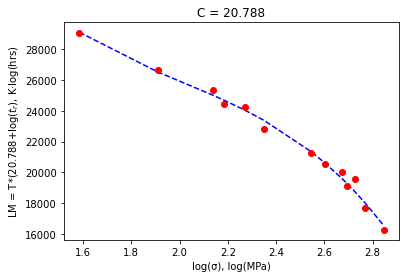

In [48]:
plt.plot(logσ, func(logσ, *fit_vals), 'b--')
plt.plot(logσ, lmparam, 'ro');
plt.xlabel('log(σ), log(MPa)')
plt.ylabel(f'LM = T*({out.x[0]:3.3f}+log($t_r$), K·log(hrs)')
plt.title(f'C = {out.x[0]:3.3f}')
plt.show()

You can see that we got a C value of 20.788 which is better than the value of 20 used by the textbook - although the difference is minor.  

Let's look at that example problem again: 

>What is the rupture lifetime at 775 C under a stress load of 355 MPa?  
We just need to calculate the LM parameter from our polynomial fit and set that equal to T*(20.789+log($t_r$)) and solve for the rupture time. 

In [49]:
fit_vals

dict_values([90544.47262043494, -83840.0363021492, 38634.264671202036, -6433.987158936594])

In [50]:
poly(np.log10(355),*fit_vals)

21284.51923218921

21284.5 = (775+273)*(20.788+log($t_r$))  

therefore the log($t_r$) = 21284.5 /  (775+273) - 20.788 = -0.47836  

or $t_r$ = $10^{-0.47836}$ = 0.33 hours (only about 1 minute different from our last answer )

## Your turn :)

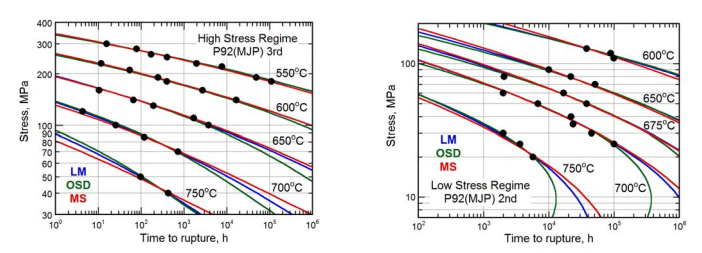

#### To do:   

1. Pick either the High Stress Regime (fig a) or the Low Stress Regime (fig b) or you can do both!  Use selectdata() and cal() to grab all of the data points on the figure you chose and replot the figure.  Remember to be careful with the log axes when you find plotpts.  Each set of points should be in a different color. Like this: 
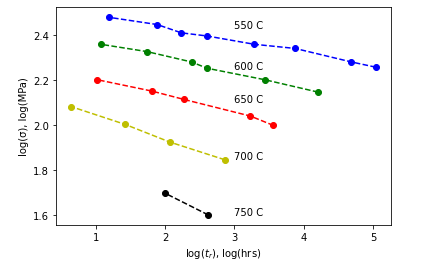

2. Collapse all your data to one curve on a Larsen-Miller plot by finding the factor "C".  This is not trial and error.  Use a fitting routine to find "C" as developed in the lesson.  My data collapsed as shown:  

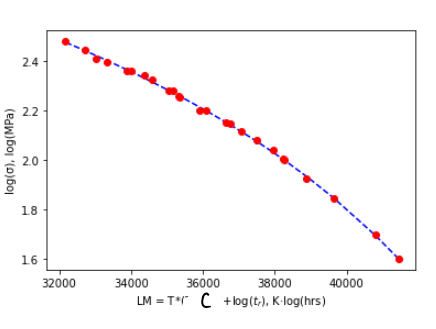

3. Print the value of C and also print the final values of the polynomial for the fit shown above.        